Clustering and Classification

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Downloading and loading the Dataset

In [2]:
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Performing Visualizations

Univariate Analysis

Hist Plot

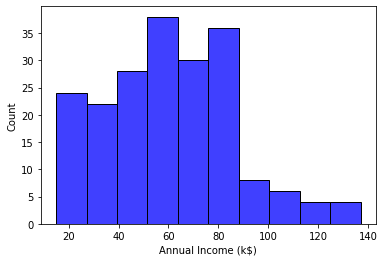

In [4]:
sns.histplot(data['Annual Income (k$)'], color="blue")

Box Plot

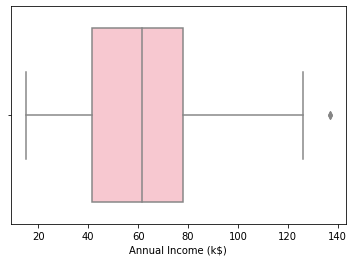

In [5]:
sns.boxplot(data['Annual Income (k$)'], color="pink")

Dist Plot

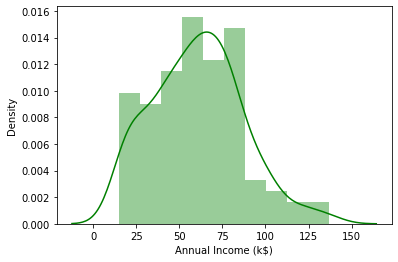

In [6]:
sns.distplot(data['Annual Income (k$)'], color="green")

Bi-Variate Analysis

Bar Plot

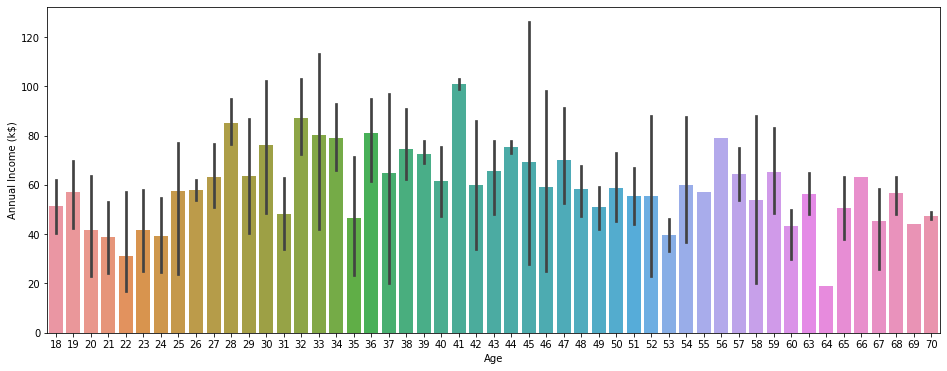

In [7]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

Line Plot

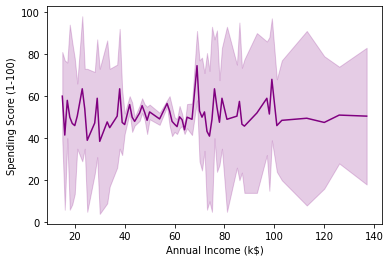

In [10]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="purple")

Scatter Plot(Age vs Spending Score)

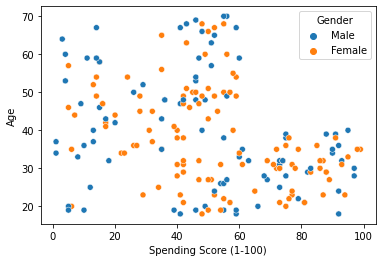

In [15]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'],hue=data['Gender'])

Gender vs Age Distribution

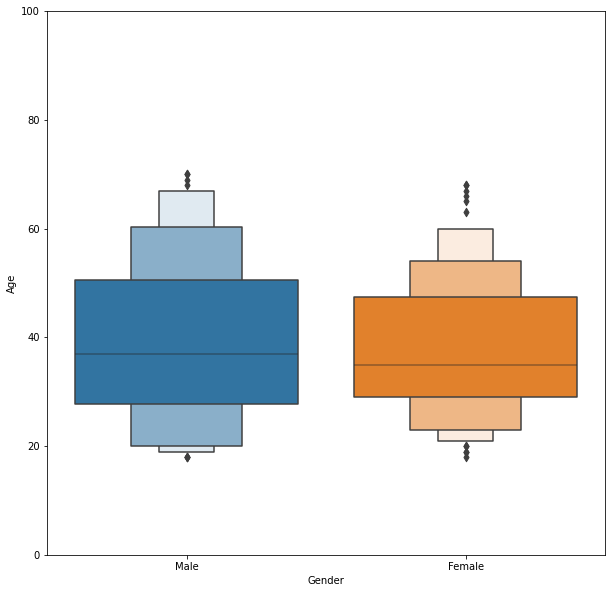

In [16]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)
f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

Annual Income vs Gender Countplot

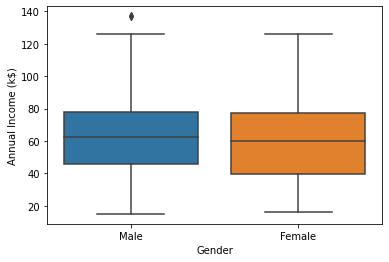

In [17]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

Multi-Variate Analysis

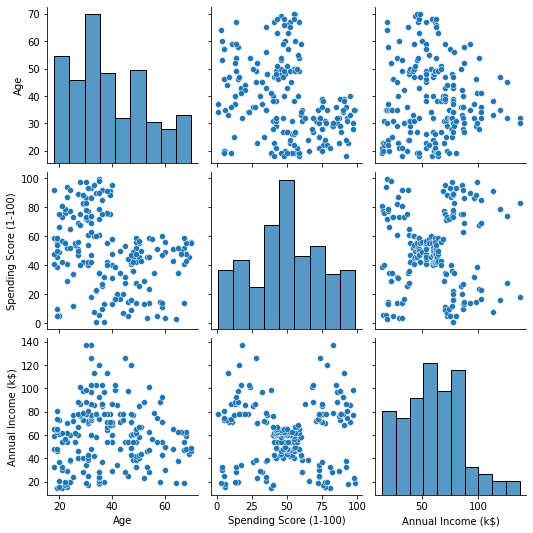

In [18]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

Correlation between different attributes

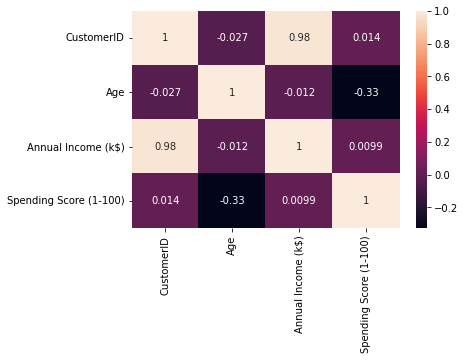

In [19]:
sns.heatmap(data.corr(),annot=True)

Performing Descriptive Stats on the Dataset

In [20]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [23]:
data.shape

(200, 5)

Checking for Null values

In [25]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [26]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Finding the outliers and replacing them

In [27]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

After removing outliers, boxplot be like

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad0df89a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad0e45ae90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad0e005d10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad0c66d210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad0c66db50>],
 'means': []}

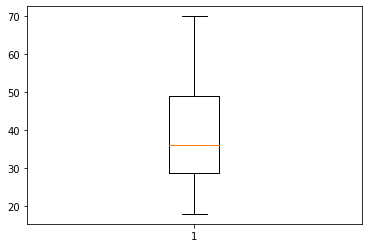

In [28]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad0c51ddd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad0c523890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad0c51d850>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad0c4a9390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad0c4a98d0>],
 'means': []}

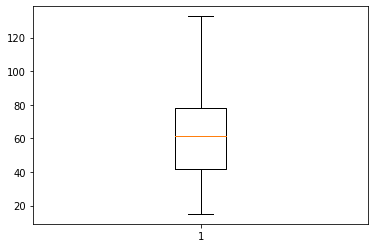

In [29]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad0c48c850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad0c493310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad0c48c2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad0c493dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad0c49d350>],
 'means': []}

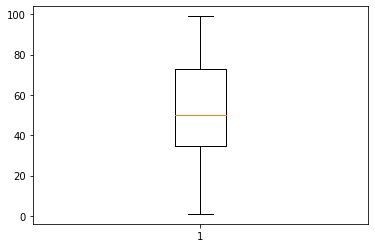

In [30]:
plt.boxplot(data['Spending Score (1-100)'])

Checking for categorical columns and performing encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [33]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


Scaling the data

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

Performing one of the clustering algorithms

In [35]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([5, 5, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2, 0, 3, 5, 0, 5, 1, 0, 5, 5,
       2, 5, 2, 5, 2, 5, 2, 0, 1, 0, 1, 5, 2, 0, 2, 0, 2, 0, 2, 5, 1, 0,
       2, 0, 2, 0, 0, 0, 2, 5, 0, 1, 2, 1, 2, 1, 0, 1, 1, 5, 2, 2, 1, 5,
       2, 2, 5, 0, 1, 2, 2, 2, 1, 5, 2, 5, 0, 2, 1, 5, 1, 2, 0, 1, 2, 0,
       0, 2, 2, 5, 1, 2, 0, 5, 2, 0, 1, 5, 0, 2, 1, 5, 1, 0, 2, 1, 1, 1,
       1, 0, 2, 5, 0, 0, 2, 2, 2, 2, 5, 2, 6, 4, 0, 6, 3, 4, 1, 4, 3, 4,
       0, 6, 3, 6, 7, 4, 3, 6, 7, 4, 0, 6, 3, 4, 3, 6, 7, 4, 3, 4, 7, 6,
       7, 6, 3, 6, 3, 6, 7, 6, 3, 6, 3, 6, 3, 6, 7, 4, 3, 4, 3, 4, 7, 6,
       3, 4, 3, 4, 7, 6, 3, 6, 7, 4, 7, 4, 7, 6, 7, 6, 3, 6, 7, 6, 7, 4,
       3, 4], dtype=int32)

In [36]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [37]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,5
1,1.0,0.057692,0.000000,0.816327,5
2,0.0,0.038462,0.008493,0.051020,0
3,0.0,0.096154,0.008493,0.775510,0
4,0.0,0.250000,0.016985,0.397959,0


In [38]:
data1['kclus'].unique()

array([5, 0, 2, 1, 3, 6, 4, 7], dtype=int32)

In [39]:
data1['kclus'].value_counts()

2    38
0    37
1    26
5    24
6    22
3    20
4    18
7    15
Name: kclus, dtype: int64

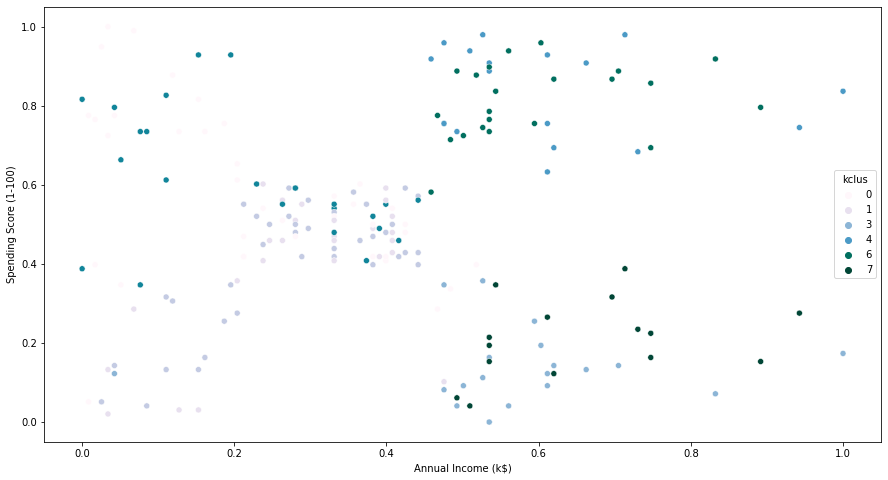

In [42]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [43]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [44]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,5
1,5
2,0
3,0
4,0


Splitting dataset into train and test data

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [46]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [48]:
y_train.head()

,kclus
116,2
67,2
78,0
42,1
17,5


In [49]:
y_test.head()

,kclus
58,0
40,2
34,2
102,1
184,7


In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[2.5981396 ],
       [1.17658438],
       [1.06445029],
       [2.85780275],
       [4.47154286]])

Measuring the performance using metrics

In [52]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.8909777696125136
The Root mean squared error is:  1.9725561511938041
The Mean absolute error is:  1.6882191243976243
The accuracy is:  0.2616351288490302
